In [1]:
# importing Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# import the Data .
dataset = pd.read_csv('data/Iris_Data.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Test messing data . 
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# Splitting the Data to Features and Target .
X = dataset.iloc[:,:-1].values
y = dataset.iloc[: , -1].values

In [5]:
# Convert string data to numerical values .
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
# Splitting the Data to Training and Test .
X_train , X_test , y_train , y_test = train_test_split(X ,
                                                       y ,
                                                       test_size = 0.3 ,
                                                       random_state = 0)

In [7]:
# Classification : 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {'Logestic_Regression' : LogisticRegression() ,
          'KNN' : KNeighborsClassifier() ,
          'Random_Forest_Classifier' : RandomForestClassifier() ,
          'SVC' : SVC() ,
          'Decision_Tree' : DecisionTreeClassifier()
          }

In [8]:
def fit_and_score(models , X_train , X_test , y_train , y_test) :
    model_scores = {}
    model_confusion = {}
    for name , model in models.items() :
        # fitting the data :
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
        y_predict = model.predict(X_test)
        model_confusion[name] = confusion_matrix(y_test , y_predict)
    return model_scores , model_confusion

In [9]:
fit_and_score(models = models ,
              X_train = X_train,X_test = X_test,
              y_train = y_train,y_test = y_test )

({'Logestic_Regression': 0.9777777777777777,
  'KNN': 0.9777777777777777,
  'Random_Forest_Classifier': 0.9777777777777777,
  'SVC': 0.9777777777777777,
  'Decision_Tree': 0.9777777777777777},
 {'Logestic_Regression': array([[16,  0,  0],
         [ 0, 17,  1],
         [ 0,  0, 11]], dtype=int64),
  'KNN': array([[16,  0,  0],
         [ 0, 17,  1],
         [ 0,  0, 11]], dtype=int64),
  'Random_Forest_Classifier': array([[16,  0,  0],
         [ 0, 17,  1],
         [ 0,  0, 11]], dtype=int64),
  'SVC': array([[16,  0,  0],
         [ 0, 17,  1],
         [ 0,  0, 11]], dtype=int64),
  'Decision_Tree': array([[16,  0,  0],
         [ 0, 17,  1],
         [ 0,  0, 11]], dtype=int64)})

In [10]:
# All Algorithms have the same score .

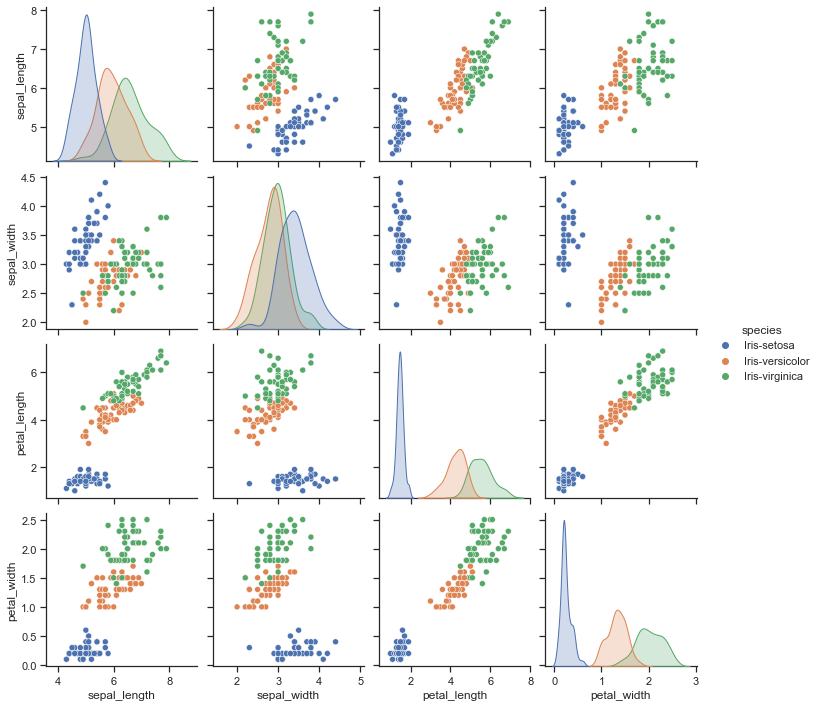

In [11]:
# Visualization The Data .

sns.set_theme(style="ticks")
ax = sns.pairplot(dataset , hue = "species")

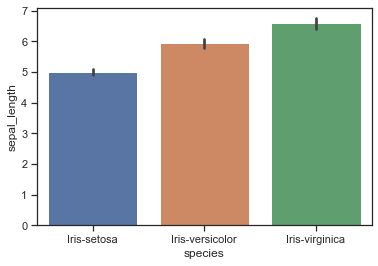

In [12]:
sns.barplot(data = dataset , x = dataset['species'] , y = dataset['sepal_length']);

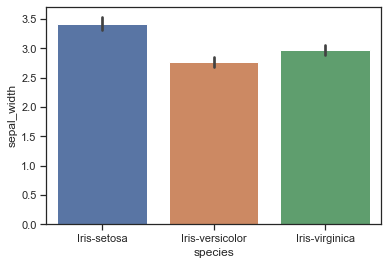

In [13]:
sns.barplot(data = dataset , x = dataset['species'] , y = dataset['sepal_width']);

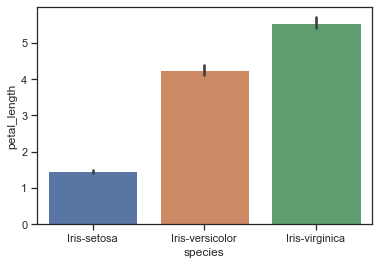

In [14]:
sns.barplot(data = dataset , x = dataset['species'] , y = dataset['petal_length']);

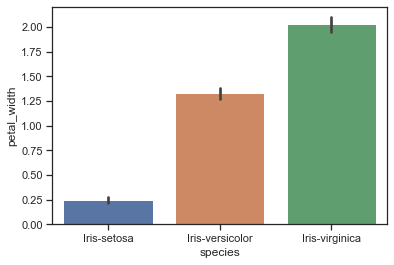

In [15]:
sns.barplot(data = dataset , x = dataset['species'] , y = dataset['petal_width']);